Вариант 4

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_7849/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


Метод Р-К (3 порядка):
$$ k_1 = \tau \cdot f(t_n, u_n) $$
$$ k_2 = \tau \cdot f(t_n + \dfrac{\tau}{2}, u_n + \dfrac{k_1}{2}) $$
$$ k_3 = \tau \cdot f(t_n + \tau, u_n - k_1 + 2 \cdot k_2) $$
$$ u_{n+1} = u_n + \dfrac{k_1 + 4 \cdot k_2 + k_3}{6}

In [2]:
#                       0,1,2,3 
# du/dt = f(t, u) | u = x,y,z,u
def f (u):
    assert (u.size == 4)
    res = np.array ([u[2], u[3], (-u[0]) / (u[0] ** 2 + u[1] ** 2) ** (3/2), (-u[1]) / (u[0] ** 2 + u[1] ** 2) ** (3/2)])
    return res

In [3]:
tau = 0.01

In [4]:
u_start = np.array ([0.5, 0, 0, 1.73])
u = u_start

In [5]:
res_u = [u_start]
time =  [0]
for i in np.arange (tau, 20, tau):
    k1 = tau * f (u)
    k2 = tau * f (u + k1/2)
    k3 = tau * f (u - k1 + 2*k2)
    u = u + (k1 + 4*k2 + k3)/6
    res_u.append(u)
    time.append(i)

In [6]:
x_res = []
y_res = []

for i in res_u:
    x_res.append(i[0])
    y_res.append(i[1])

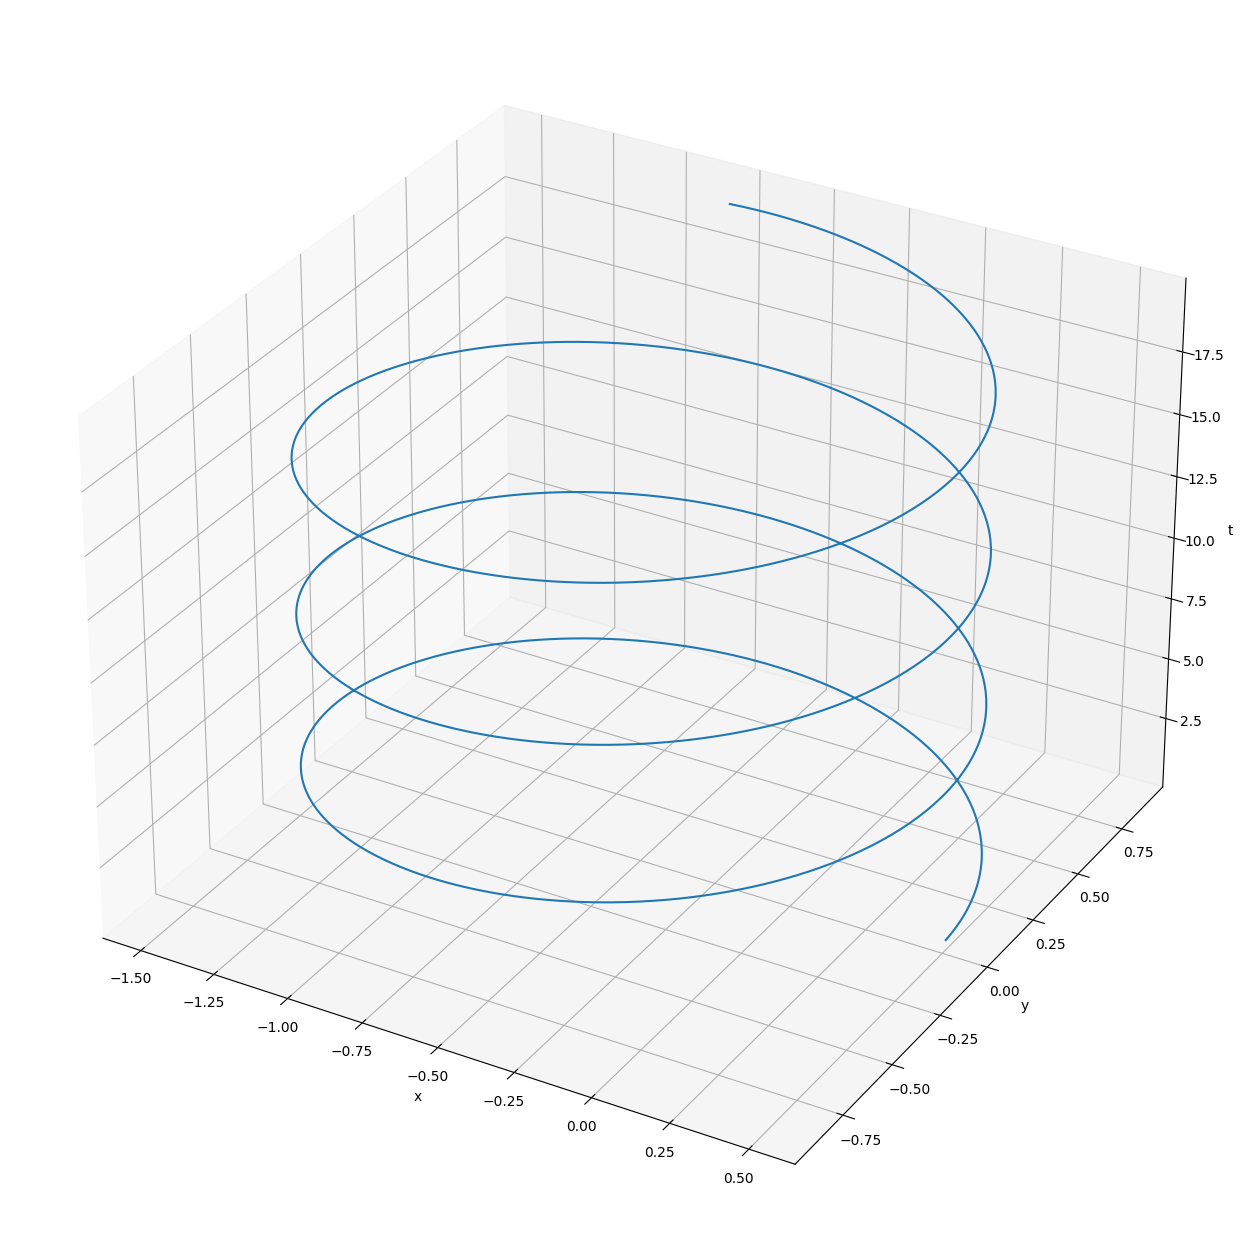

In [7]:
plt.figure(figsize=(16,16))
ax1 = plt.axes(projection = '3d')

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("t")
ax1.plot3D(x_res[1:], y_res[1:], time[1:])

# plt.grid()
# plt.legend()
plt.savefig("picturies/graph1.png", dpi=100)
plt.show()

Метод Адамса (3 порядка):
$$ k_1 = \tau \cdot f(x_n, u_n) $$
$$ k_2 = \tau \cdot f(x_{n-1}, u_{n-1}) $$
$$ k_3 = \tau \cdot f(x_{n-2}, u_{n-3}) $$
$$ u_{n+1} = u_n+ \dfrac{23 \cdot k_1 - 16 \cdot k_2 + 5 \cdot k_3}{12} $$

In [8]:
res_a = []

for i in range(3):
    res_a.append(res_u[i])

In [9]:
for i in range(3, len(time)):
    k1 = tau * f(res_a[i-1])
    k2 = tau * f(res_a[i-2])
    k3 = tau * f(res_a[i-3])
    res_a.append(res_a[i-1] + (23*k1 - 16*k2 + 5*k3)/12)

In [10]:
a_x_res = []
a_y_res = []

for i in res_a:
    a_x_res.append(i[0])
    a_y_res.append(i[1])

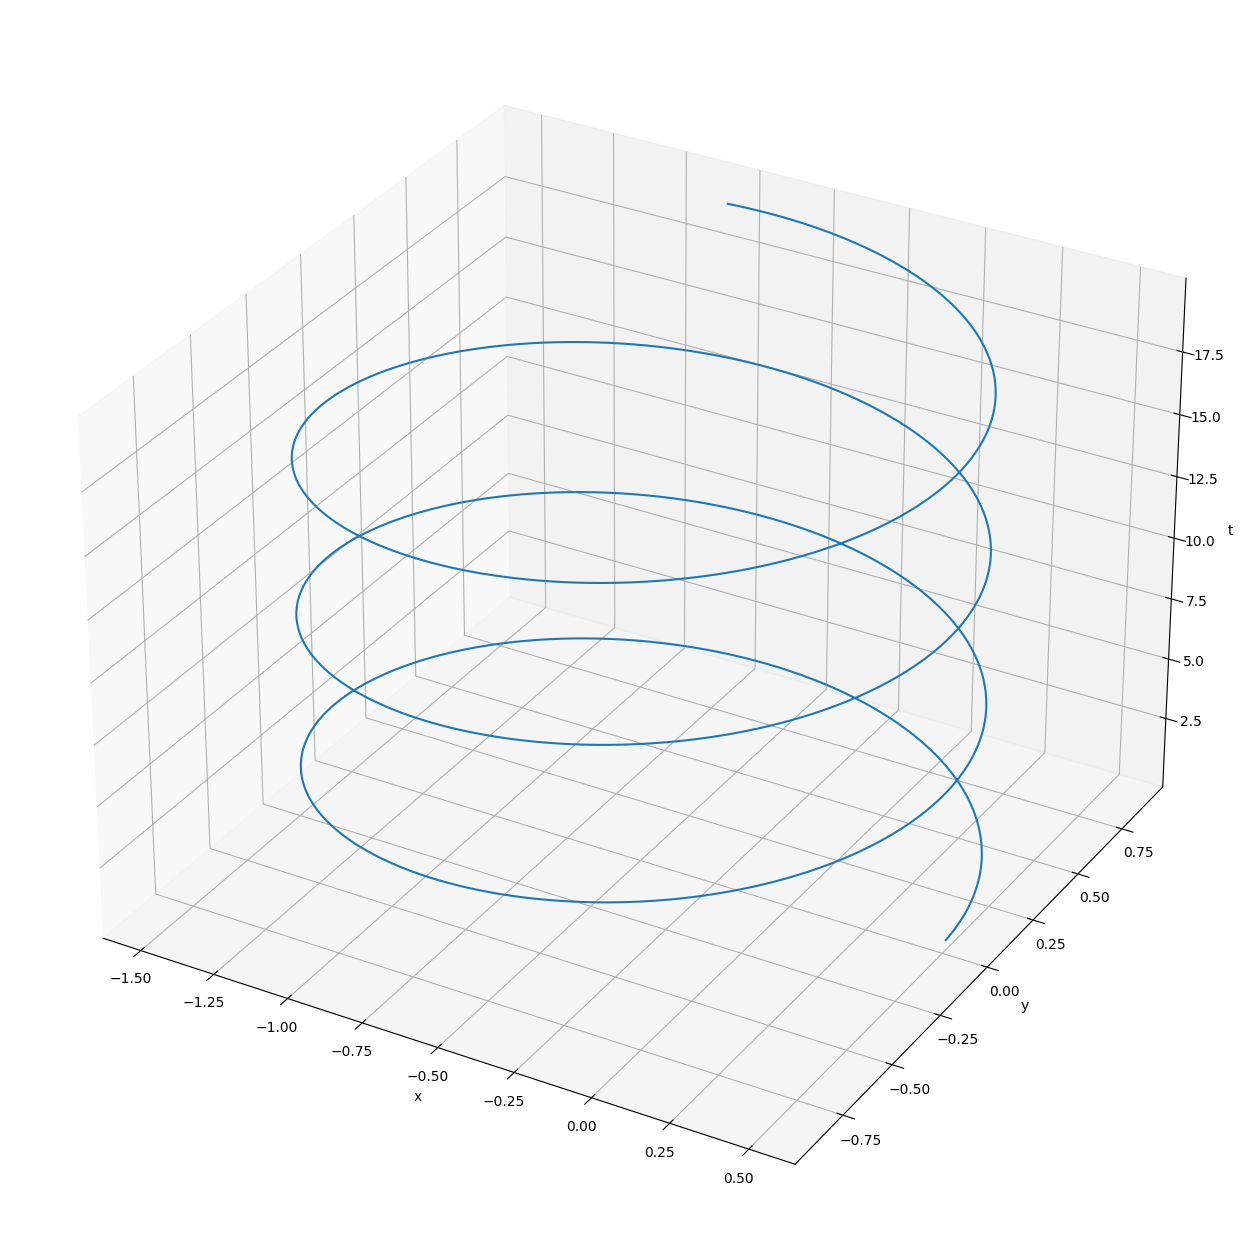

In [11]:
plt.figure(figsize=(16,16))
ax1 = plt.axes(projection = '3d')

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("t")
ax1.plot3D(a_x_res[1:], a_y_res[1:], time[1:])

# plt.grid()
# plt.legend()
plt.savefig("picturies/graph2.png", dpi=100)
plt.show()